In [1]:
from TinySAM import *
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm, trange
from torch.utils.data import DataLoader

# Setting Up Models

In [2]:
GroundingModel = GDino(text_threshold=0.15, box_threshold=0.2)
SAMModel = SAM2()

# Load Data to RAM

In [3]:
data = ZeroShotObjectDetectionDataset('./Data/cityscapes/',do_preprocess=False, processor=GroundingModel.processor)

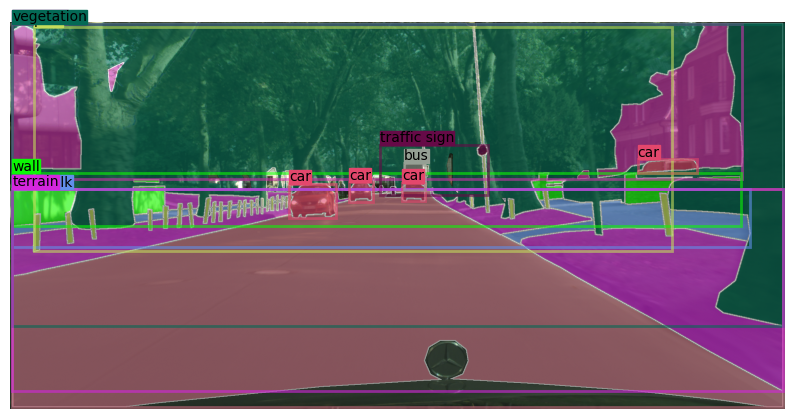

In [4]:
# visualize a random sample
rnd_idx = np.random.randint(0,len(data))
data.visualize(rnd_idx)

# Run Grounding Dino

In [5]:
batch_size = 8
dataloader = DataLoader(data, batch_size=batch_size, shuffle=False)

# # get the text prompts
input_ids = data.input_prompt_ins.input_ids.to(GroundingModel.device)
target_image_size = data.image_size

boxes, labels, scores = GroundingModel.run_loader(dataloader, input_ids, data.text_prompts, target_image_size)

  0%|          | 0/63 [00:00<?, ?it/s]

# Run SAM2

In [6]:
masks = SAMModel(data.images, boxes)

  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
len(masks[0])

50

In [12]:
# Save Results (if needed)
# np.save('masks.npy', np.array(masks, dtype=object))
import pickle
with open('masks.pkl', 'wb') as f:
    pickle.dump(masks, f)
# np.save('boxes.npy', np.array(boxes, dtype=object))
# np.save('labels.npy', np.array(labels, dtype=object))
# np.save('scores.npy', np.array(scores, dtype=object))

: 

In [ ]:
# Load Results (if needed)
# masks = np.load('masks.npy', allow_pickle=True)
# boxes = np.load('boxes.npy', allow_pickle=True)
# labels = np.load('labels.npy', allow_pickle=True)
# scores = np.load('scores.npy', allow_pickle=True)

# Visualize A Prediction

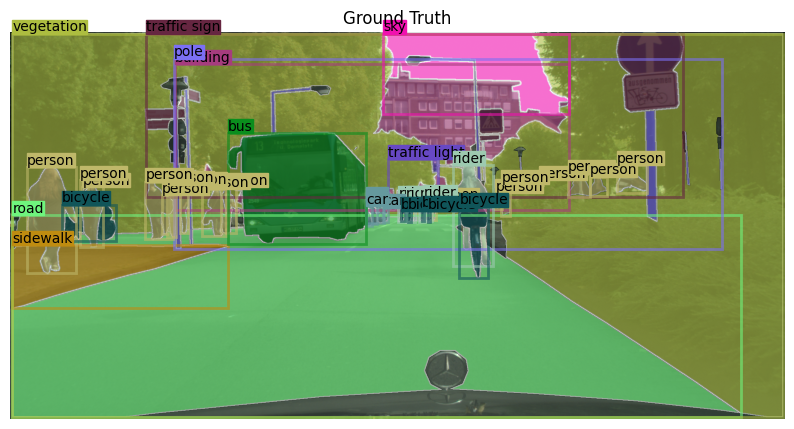

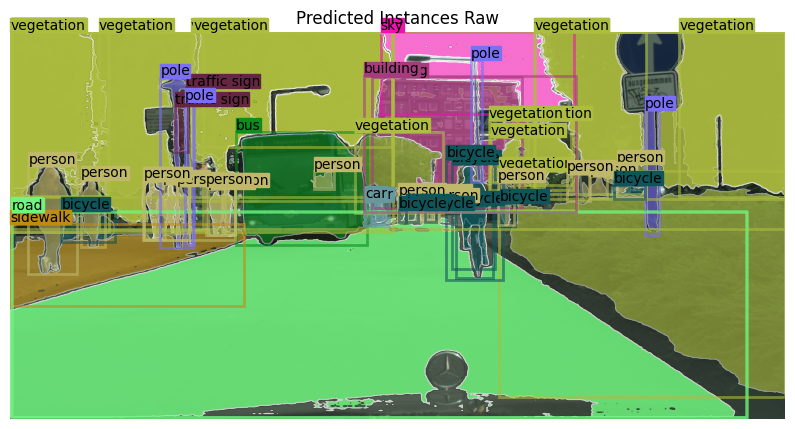

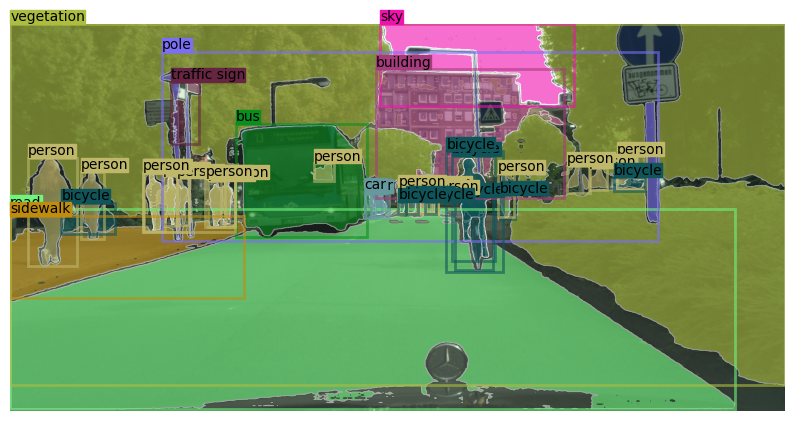

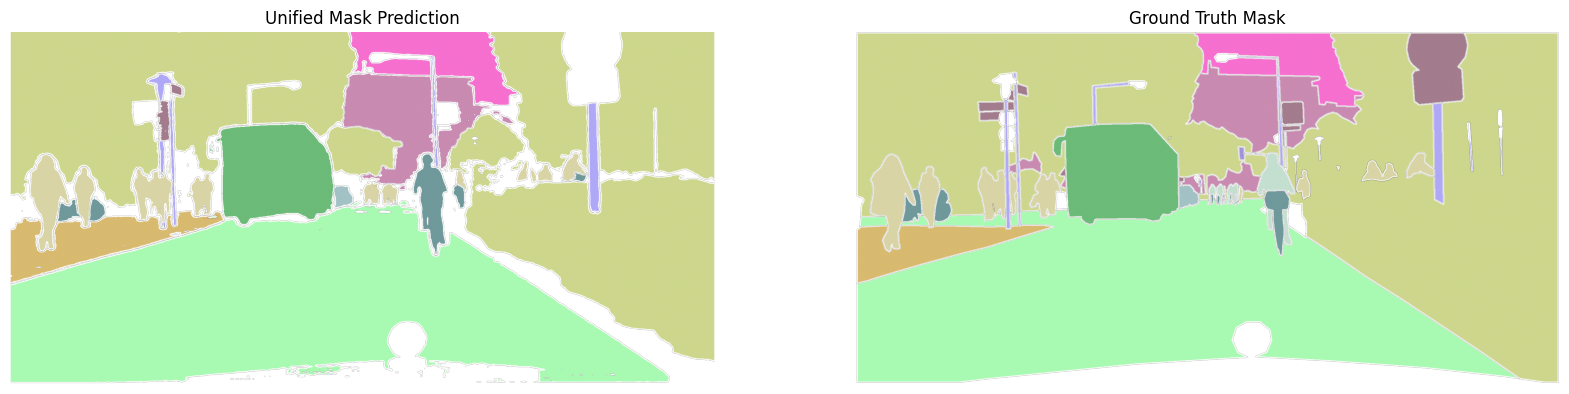

In [7]:
rnd_idx = np.random.randint(0,len(data))
# visualize ground truth
data.visualize(rnd_idx)
plt.title('Ground Truth')

# visualize the predicted masks
data.visualize_prediction(rnd_idx, boxes[rnd_idx], masks[rnd_idx], labels[rnd_idx])
plt.title('Predicted Instances Raw')

# visualize the predicted masks after post-processing
data.visualize_prediction(rnd_idx, boxes[rnd_idx], masks[rnd_idx], labels[rnd_idx], unify=True)

In [9]:
mIoU, mAP, overall_iou, processed_boxes, processed_labels, processed_masks, processed_scores, unified_masks = data.evaluate_precitions(boxes, labels, masks, scores, return_processed=True)

  0%|          | 0/500 [00:00<?, ?it/s]

TypeError: 'bool' object is not subscriptable